In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
                                                                    
import matplotlib.cm as cm  # colormaps
                                        
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp

In [3]:
# If running on lab machine execute this cell
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models, Model 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization, Layer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import backend as K

In [4]:
# Load cifar-10 image dataset. Details of the CIFAR-10 dataset can be found 
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18), classes=10):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,:]) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None and i<classes:
            ax[i].set_title(titles[i%classes])

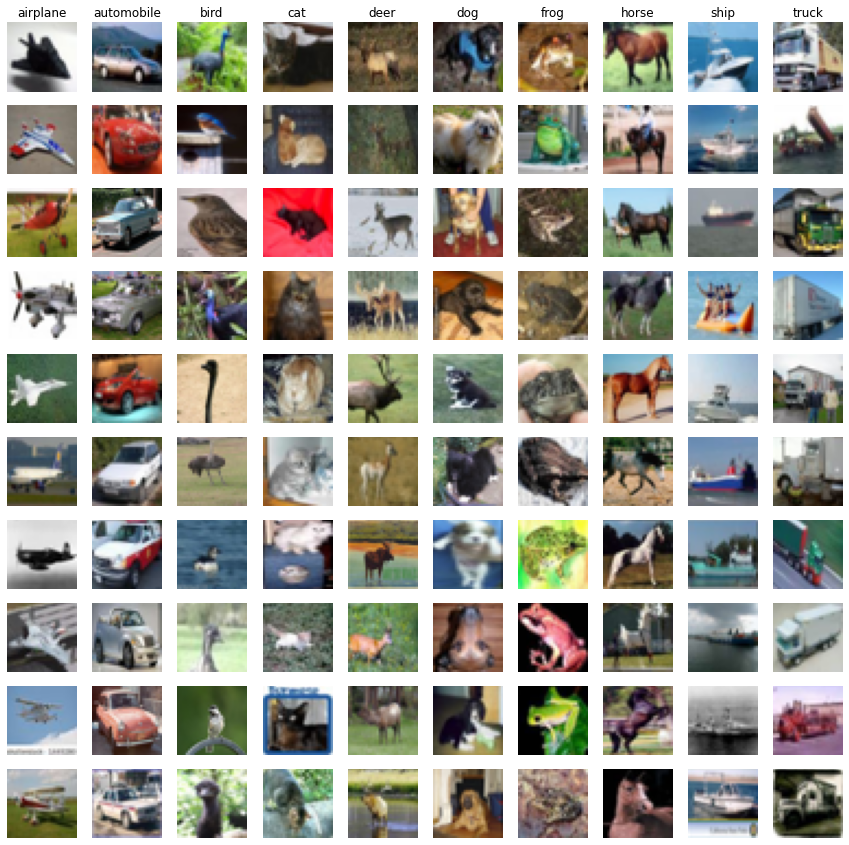

In [6]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = None
for i in range(0, len(classes)):
    index = np.where(cy_train==i)[0]
    if i == 0:
        images_to_plot = cx_train[index[0:10],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, cx_train[index[0:10],:,:]))
images_to_plot = images_to_plot.reshape(10,10,32, 32, 3).transpose(1,0,2,3,4).reshape(100,32,32,3)
plot_colour_images(images_to_plot, nrows=10, ncols=10,thefigsize=(15,15), titles=classes)

In [7]:
#choosing classes airplane, automobile, bird and truck
index_train = []
index_test = []

for i in [0,1,2,9]:
    index_train = index_train + list(np.where(cy_train==i)[0])
    index_test = index_test + list(np.where(cy_test==i)[0])
cy_train_ss = cy_train[index_train]
cy_train_ss = np.where(cy_train_ss==9,3,cy_train_ss)
cx_train_ss = cx_train[index_train,:,:]
cy_test_ss = cy_test[index_test]
cy_test_ss = np.where(cy_test_ss==9,3,cy_test_ss)
cx_test_ss = cx_test[index_test,:,:]
print(cx_train_ss.shape, cy_train_ss.shape)
print(cx_test_ss.shape, cy_test_ss.shape)

(20000, 32, 32, 3) (20000, 1)
(4000, 32, 32, 3) (4000, 1)


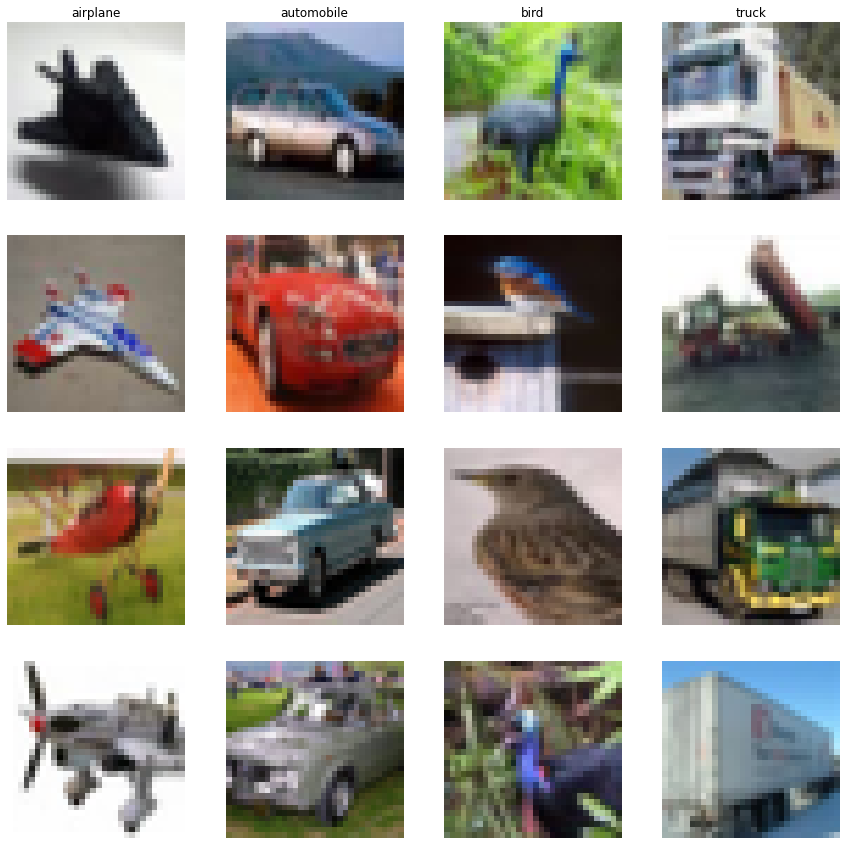

In [8]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'truck']
images_to_plot = None
for i in [0,1,2,3]:
    index = np.where(cy_train_ss==i)[0]
    if i == 0:
        images_to_plot = cx_train_ss[index[0:4],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, cx_train_ss[index[0:4],:,:]))
images_to_plot = images_to_plot.reshape(4,4,32, 32, 3).transpose(1,0,2,3,4).reshape(16,32,32,3)
plot_colour_images(images_to_plot, nrows=4, ncols=4,thefigsize=(15,15), titles=classes, classes=len(classes))

In [9]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
cy_train_one_hot = to_categorical(cy_train_ss)
cy_test_one_hot = to_categorical(cy_test_ss)
cy_train_one_hot.shape, cy_train_one_hot.shape

((20000, 4), (20000, 4))

In [11]:
#train_size = 64
train_size = 832
#train_size = 1664
#train_size = 2560

In [12]:
c_size = int(train_size/4)
x_train = cx_train_ss[:c_size,:,:]
print(cy_train_ss.shape)
y_train = cy_train_ss[:c_size,:]
y_train_one_hot = cy_train_one_hot[:c_size,:]
for i in range(1,4):
    x_train = np.vstack((x_train, cx_train_ss[i*5000:(i*5000)+c_size,:,:]))
    y_train = np.vstack((y_train, cy_train_ss[i*5000:(i*5000)+c_size,:]))
    y_train_one_hot = np.vstack((y_train_one_hot, cy_train_one_hot[i*5000:(i*5000)+c_size,:]))
print(x_train.shape, y_train.shape, y_train_one_hot.shape)

(20000, 1)
(832, 32, 32, 3) (832, 1) (832, 4)


In [13]:
c_count = 0
for c in [0,1,2,3]:
    r = np.where(y_train==c)
    print('class ',c,':',len(r[0]))
    c_count += len(r[0])
print(c_count)

class  0 : 208
class  1 : 208
class  2 : 208
class  3 : 208
832


(16, 32, 32, 3)


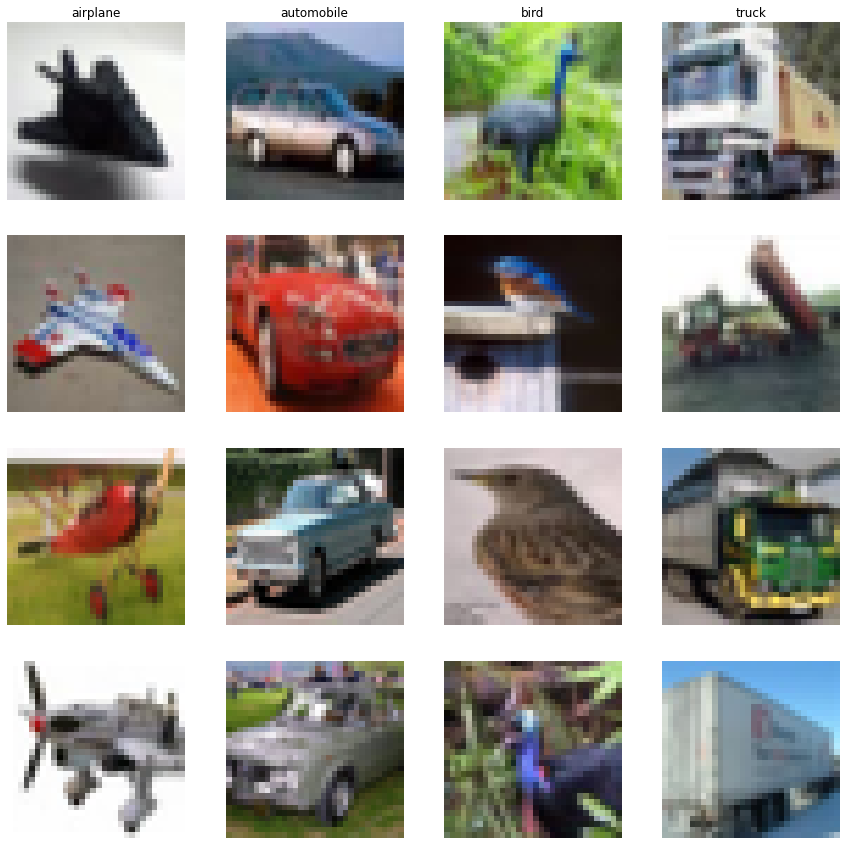

In [14]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'truck']
images_to_plot = None
for i in [0,1,2,3]:
    index = np.where(y_train==i)[0]
    if i == 0:
        images_to_plot = x_train[index[0:4],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, x_train[index[0:4],:,:]))
print(images_to_plot.shape)
images_to_plot = images_to_plot.reshape(4,4,32, 32, 3).transpose(1,0,2,3,4).reshape(16,32,32,3)
plot_colour_images(images_to_plot, nrows=4, ncols=4,thefigsize=(15,15), titles=classes, classes=len(classes))

In [19]:
# Initialize
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
%reload_ext tensorboard

In [21]:
import shutil
# Create the root log directory to record metrics using tensorboard callback
logdir = "tensorboard_callback_logs"
if os.path.exists(logdir):
    shutil.rmtree(logdir)
os.mkdir(logdir)

In [22]:
# Run
%tensorboard --logdir tensorboard_callback_logs --host localhost --port 6009

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E0721 19:11:45.171962 140735868162944 program.py:311] TensorBoard could not bind to port 6009, it was already in use
ERROR: TensorBoard could not bind to port 6009, it was already in use

In [23]:
import datetime

# Create tensorboard callbacks 

# Create tensorboard callback that tracks metrics at each epoch
logdir = os.path.join("tensorboard_callback_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_epoch_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
                                                            #, write_graph=False, profile_batch=0)
# Create tensorboard callback that tracks metrics at each batch
logdir = os.path.join("tensorboard_callback_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_batch_callback = tf.keras.callbacks.TensorBoard(logdir, update_freq='batch', histogram_freq=1)


In [24]:
batch_size = 64

In [25]:
# We start by creating a CNN model

# Convolutional layers with batch normalization and max pooling. Refer to Chollet's book for details on 
# pooling and also for padding and strides. For batch normalization refer to the paper in the references below.
def expert_model(input, output, count):
    filter_size = (3,3)
    filters = 8
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3))(input)
    x = BatchNormalization()(x)
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)

    filters = 32
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)

    filters = 64
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = BatchNormalization()(x) 
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(output, activation='softmax',name='softmax'+str(count))(x)
    return x

In [69]:
class selector_expectation_new(Layer):
    def __init__(self,num_experts, **kwargs):
        self.num_experts = num_experts
        super(selector_expectation,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector_expectation, self).build(input_shape)
        
    def call(self,input):
        batch_size = 64
        x = input[0]
        p = input[1]
        x = K.reshape(x,(batch_size, self.num_experts, 4))
 
        output = K.sum(K.repeat_elements(K.reshape(p,(batch_size,self.num_experts,1)), rep=4,axis=2) * x, axis=1) 
#         for i in range(0, 6):
#             tf.print(x[i])
#             tf.print(p[i])
#             tf.print(output[i])
#         for i in range(53, 59):
#             tf.print(x[i])
#             tf.print(p[i])
#             tf.print(output[i])

        return [output, input]
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],1,input_shape[-1])

    def get_config(self):
        return super(selector_expectation,self).get_config()


In [26]:
class selector_expectation(Layer):
    def __init__(self,num_experts, **kwargs):
        self.num_experts = num_experts
        super(selector_expectation,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector_expectation, self).build(input_shape)
        
    def call(self,input):

        x = input[0]
        p = input[1]
        #tf.print(K.shape(p))
        x = K.reshape(x,(batch_size, self.num_experts, 4))
 
        output = K.sum(K.repeat_elements(K.reshape(p,(batch_size,self.num_experts,1)), rep=4,axis=2) * x, axis=1) 
        #tf.print('x:',x)
        #tf.print(p[0:6])

        return output
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],1,input_shape[-1])

    def get_config(self):
        return super(selector_expectation,self).get_config()


In [17]:
class selector_expectation_old1(Layer):
    def __init__(self,**kwargs):
        super(selector_expectation,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector_expectation, self).build(input_shape)
        
    def call(self,x):
        batch_size = 64
        #tf.print(K.shape(x))
        x = K.reshape(x,(batch_size, num_experts+1, 4))
        #tf.print(K.shape(x))
        #for i in range(53, 59):
        #    tf.print(x)
 
        output = K.sum(K.repeat_elements(K.reshape(x[:, num_experts,:],(batch_size,num_experts,1)), rep=num_experts,axis=2) * x[:,0:num_experts,:], axis=1) 
        #output = K.sum(x[4,:,:] * x[0:4,:,:], axis=0)
#         for i in range(43, 64):
#             tf.print(x[i,0:4,:])
#             tf.print(x[i,4,:],output[i])
        return output
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],1,input_shape[-1])

    def get_config(self):
        return super(selector_expectation,self).get_config()


In [27]:
input = layers.Input(shape=(32,32,3), name='myInput')

### Testing just the convolutional model

In [72]:
simple_model = Model(input, expert_model(input, 4, 0), name='simple_model')
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="categorical_accuracy")
simple_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=15, batch_size=batch_size, shuffle=True)
simple_model.summary = simple_model.history.history

Epoch 1/15
26/26 [==============================] - 2s 83ms/step - loss: 1.1918 - categorical_accuracy: 0.5204
Epoch 2/15
26/26 [==============================] - 2s 83ms/step - loss: 0.7581 - categorical_accuracy: 0.6815
Epoch 3/15
26/26 [==============================] - 2s 89ms/step - loss: 0.5834 - categorical_accuracy: 0.7698
Epoch 4/15
26/26 [==============================] - 2s 92ms/step - loss: 0.4346 - categorical_accuracy: 0.8456
Epoch 5/15
26/26 [==============================] - 3s 99ms/step - loss: 0.3061 - categorical_accuracy: 0.9093
Epoch 6/15
26/26 [==============================] - 2s 92ms/step - loss: 0.2081 - categorical_accuracy: 0.9405
Epoch 7/15
26/26 [==============================] - 3s 96ms/step - loss: 0.1290 - categorical_accuracy: 0.9724
Epoch 8/15
26/26 [==============================] - 2s 95ms/step - loss: 0.0845 - categorical_accuracy: 0.9820
Epoch 9/15
26/26 [==============================] - 2s 96ms/step - loss: 0.0749 - categorical_accuracy: 0.9856
E

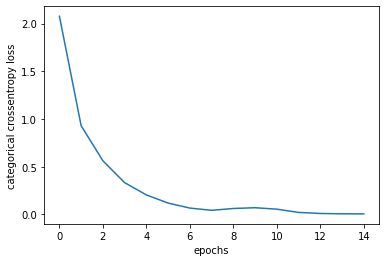

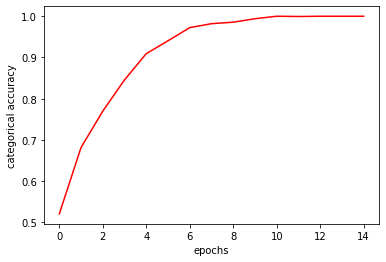

In [73]:
plt.plot(range(len(simple_model.summary['loss'])), summary['loss'])
plt.xlabel('epochs')
plt.ylabel('categorical crossentropy loss')
plt.show()
plt.plot(range(len(simple_model.summary['categorical_accuracy'])), simple_model.summary['categorical_accuracy'], color='r')
plt.xlabel('epochs')
plt.ylabel('categorical accuracy')
plt.show()

### Testing gate network

In [28]:
num_experts = 4

In [29]:
#Gate network
gate = layers.Flatten()(input)
gate = layers.Dense(5000, activation='relu')(gate)
gate = layers.Dense(1000, activation='relu')(gate)
gate = layers.Dense(500, activation='relu')(gate)
gate = layers.Dense(300, activation='relu')(gate)
gate = layers.Dropout(0.2)(gate)
gate = layers.Dense(num_experts, activation='softmax',name='softmax_gate')(gate)
#gate = expert_model(input, num_experts, num_experts)

In [34]:
gate_simple_model = Model(input, gate, name='gate_simple_model')
#gate_simple_model = Model(input, expert_model(input, 4, 4), name='gate_simple_model')
gate_simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="categorical_accuracy")
gate_simple_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=30, batch_size=batch_size, shuffle=True, callbacks=tensorboard_epoch_callback)
gate_simple_model_summary = gate_simple_model.history.history
gate_simple_model_summary

Epoch 1/30
26/26 [==============================] - 4s 139ms/step - loss: 827.2277 - categorical_accuracy: 0.2500
Epoch 2/30
26/26 [==============================] - 3s 128ms/step - loss: 53.0087 - categorical_accuracy: 0.2945
Epoch 3/30
26/26 [==============================] - 4s 135ms/step - loss: 8.2978 - categorical_accuracy: 0.3762
Epoch 4/30
26/26 [==============================] - 3s 134ms/step - loss: 3.1484 - categorical_accuracy: 0.4177
Epoch 5/30
26/26 [==============================] - 3s 129ms/step - loss: 1.7634 - categorical_accuracy: 0.4820
Epoch 6/30
26/26 [==============================] - 3s 134ms/step - loss: 1.4082 - categorical_accuracy: 0.5186
Epoch 7/30
26/26 [==============================] - 3s 132ms/step - loss: 1.2326 - categorical_accuracy: 0.5379
Epoch 8/30
26/26 [==============================] - 3s 132ms/step - loss: 1.2338 - categorical_accuracy: 0.5499
Epoch 9/30
26/26 [==============================] - 3s 131ms/step - loss: 1.3315 - categorical_accura

{'loss': [827.2276611328125,
  53.008731842041016,
  8.297829627990723,
  3.148393392562866,
  1.7633947134017944,
  1.4081664085388184,
  1.2326202392578125,
  1.233773112297058,
  1.3314706087112427,
  1.0032353401184082,
  1.176230788230896,
  1.1486746072769165,
  1.062612771987915,
  1.0877829790115356,
  1.1313022375106812,
  0.9273102879524231,
  0.8285031914710999,
  0.9857276082038879,
  0.8549334406852722,
  0.8040370345115662,
  0.9082165360450745,
  0.8606343865394592,
  0.7799228429794312,
  0.7160136699676514,
  0.7155062556266785,
  0.6922404766082764,
  0.7216053009033203,
  0.78547602891922,
  0.6399845480918884,
  0.6452067494392395],
 'categorical_accuracy': [0.25,
  0.2944711446762085,
  0.37620192766189575,
  0.41766828298568726,
  0.4819711446762085,
  0.518629789352417,
  0.5378605723381042,
  0.549879789352417,
  0.5432692170143127,
  0.5913461446762085,
  0.5234375,
  0.582932710647583,
  0.582932710647583,
  0.575120210647583,
  0.5709134340286255,
  0.6141827

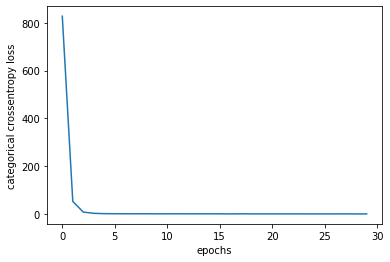

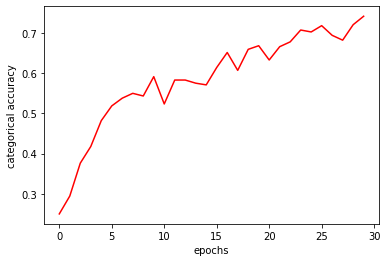

In [35]:
plt.plot(range(len(gate_simple_model_summary['loss'])), gate_simple_model_summary['loss'])
plt.xlabel('epochs')
plt.ylabel('categorical crossentropy loss')
plt.show()
plt.plot(range(len(gate_simple_model_summary['categorical_accuracy'])), gate_simple_model_summary['categorical_accuracy'], color='r')
plt.xlabel('epochs')
plt.ylabel('categorical accuracy')
plt.show()

### Create experts

In [30]:
experts = []
for i in range(num_experts):
    experts.append(expert_model(input, 4, i))

In [31]:
experts

[<tf.Tensor 'softmax0/Identity:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'softmax1/Identity:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'softmax2/Identity:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'softmax3/Identity:0' shape=(None, 4) dtype=float32>]

### Mixture of experts

In [32]:
expert_output = experts[0]
if num_experts > 1:
    expert_output = tf.keras.layers.Concatenate(axis=0)(experts)
selector_output = selector_expectation(num_experts=num_experts, trainable=False)([expert_output, gate])
selector_model = Model(input, selector_output,name='selector')

In [33]:
class CustomModel(Model):
    def train_step(self, data):
#         x, y = data
#         #tf.print('y:', y)
#         with tf.GradientTape() as tape:
#             y_pred = self(x, training=True)  # Forward pass
#             loss = self.compiled_loss(y, y_pred)
              

#         count = 0
#         trainable_gate_vars = [self.get_layer('dense').trainable_weights[0]]
#         for i in range(1, 4):
#             trainable_gate_vars.append(self.get_layer('dense_'+str(i)).trainable_weights[0])
#         trainable_gate_vars.append(self.get_layer('softmax_gate').trainable_weights[0])
        
#         trainable_vars = self.trainable_weights
#         gate_gradients = tape.gradient(loss, trainable_vars)
#         #mean_abs_gradients = [ K.abs(x) for x in gate_gradients ]
                
        #tf.print('gate_vars:', trainable_gate_vars)
        #tf.print('gate_gradients:', gate_gradients)
    
        
        return super(CustomModel, self).train_step(data)

In [ ]:
selector_model.summary()

In [27]:
class ExpectedAccuracy(tf.keras.metrics.CategoricalAccuracy):

    def __init__(self, name='expected_accuracy', **kwargs):
        super(ExpectedAccuracy, self).__init__(name=name, **kwargs)
 
    def update_state(self, y_true, y_pred, sample_weight=None):
        pred = []
        for i in range(64):
            pred.append(y_pred[i,0,:])
        pred = tf.stack(pred)
        
        super(ExpectedAccuracy, self).update_state(y_true, pred)

In [28]:
from tensorflow.keras.losses import categorical_crossentropy, mse
def exp_loss(actual, pred):
    tf.print('exp_loss', K.shape(pred))
    return mse(actual, pred)

def gate_loss(actual, output): 
    orig_actual = actual
    tf.print('gate_loss', K.shape(output))
    #tf.print(output[0:5,1,:])
    batch_size = 64
    num_experts = 2
    expert_output = output[1][0]
    gate_pred = output[1][1]
    #actual = K.repeat_elements(K.reshape(actual, (batch_size, 1, 4)), rep=2, axis=1)
    #tf.print(actual[0:5])
    #gate_actual_list = []
    #for i in range(0, batch_size):
#         index = K.argmax(mse(actual[i,:,:], expert_output[i,:,:]))
#         o = tf.zeros(K.shape(gate_pred)[-1])
#         o[index] = 1.
#         gate_actual_list.append(o)
#     gate_actual = tf.Variable(gate_actual_list)
    
    #tf.print('ACTUAL AND PRED')
    #for i in range(53, 59):
    #    tf.print(i, ':', actual[i], pred[i])
    #return mse(gate_actual, gate_pred)
    return output
    
#     total_error_list = []
#     for i in range(64):
#         error_list = []
#         for j in range(4):          
#             error_list.append(tf.multiply(probs[i,j], 
#                                           mse(actual[i,:],pred[j,i,:])))
#         error = tf.stack(error_list)
#         total_error_list.append(tf.reduce_sum(error))
#     total_error = tf.stack(total_error_list)
#     return total_error


In [34]:
#selector_model.reset_states()
selector_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")
#gate.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")
#for expert in experts:
#    expert.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")

In [35]:
custom_model = CustomModel(input, selector_output)

In [ ]:
custom_model.summary()

In [ ]:
trainable_gate_vars = [custom_model.get_layer('dense').trainable_weights[0]]
print(trainable_gate_vars)
for i in range(1, 4):
    trainable_gate_vars.append(custom_model.get_layer('dense_'+str(i)).trainable_weights)
trainable_gate_vars.append(custom_model.get_layer('softmax_gate').trainable_weights)
for i in range(0, len(trainable_gate_vars),2):
    print(trainable_gate_vars[i])

In [36]:
custom_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")

In [37]:
custom_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=15, batch_size=batch_size, shuffle=True, callbacks=[tensorboard_epoch_callback])

Epoch 1/15
13/13 [==============================] - 6s 469ms/step - loss: 1.9195 - categorical_accuracy: 0.2632
Epoch 2/15
13/13 [==============================] - 6s 452ms/step - loss: 1.5619 - categorical_accuracy: 0.2752
Epoch 3/15
13/13 [==============================] - 6s 479ms/step - loss: 1.4828 - categorical_accuracy: 0.2524
Epoch 4/15
13/13 [==============================] - 6s 496ms/step - loss: 1.4406 - categorical_accuracy: 0.2043
Epoch 5/15
13/13 [==============================] - 6s 465ms/step - loss: 1.4237 - categorical_accuracy: 0.2536
Epoch 6/15
13/13 [==============================] - 6s 457ms/step - loss: 1.4103 - categorical_accuracy: 0.2500
Epoch 7/15
13/13 [==============================] - 6s 477ms/step - loss: 1.3972 - categorical_accuracy: 0.2608
Epoch 8/15
13/13 [==============================] - 6s 476ms/step - loss: 1.3927 - categorical_accuracy: 0.2272
Epoch 9/15
13/13 [==============================] - 6s 490ms/step - loss: 1.3909 - categorical_accuracy:

In [48]:
# Function that trains the model with the given inputs and computes the gradient of the output with the weights
# of the model
from tensorflow.keras.losses import categorical_crossentropy, mse
def train(inputs, outputs, model, layer):
  
    
    with tf.GradientTape() as tape:
        # train the model with the given inputs (the `trainingExample`)
        current_loss = categorical_crossentropy(outputs, model(inputs)) 
    
    listOfVariableTensors = layer.trainable_weights
      
    # evaluate the gradient of the output wrt to the model weights
    evaluated_gradients = tape.gradient(current_loss, listOfVariableTensors)
    
    return current_loss, listOfVariableTensors, evaluated_gradients

In [ ]:
outputTensor, listOfVariableTensors, evaluated_gradients = train(x_train[:64], y_train_one_hot[:64,:], custom_model, selector_model.get_layer('softmax_gate'))
evaluated_gradients

In [ ]:
outputTensor, listOfVariableTensors, evaluated_gradients = train(x_train[:64], y_train_one_hot[:64,:], selector_model, selector_model.get_layer('softmax_gate'))
evaluated_gradients

In [29]:
selector_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=5, batch_size=batch_size, shuffle=True,callbacks=[tensorboard_epoch_callback])

Epoch 1/5
[4 2]
x: [[[0.212958068 0.433845162 0.271658093 0.0815387219]
  [0.0812893733 0.542428136 0.348130941 0.0281514898]]

 [[0.00954991858 0.84497726 0.0873181522 0.0581546351]
  [0.116442218 0.624689817 0.231016979 0.027850993]]

 [[0.673390031 0.195158571 0.0379258953 0.0935255215]
  [0.499597102 0.238806248 0.0383938 0.223202795]]

 [[0.745656371 0.0853894129 0.0106561575 0.15829806]
  [0.583417952 0.0566668659 0.0502386652 0.309676498]]]
 1/16 [>.............................] - ETA: 0s - loss: 1.7181 - categorical_accuracy: 0.2500[4 2]
x: [[[0.0292368308 0.0858080238 0.748141527 0.136813641]
  [0.0724732876 0.321117848 0.4870933 0.119315624]]

 [[0.0274562631 0.0787401348 0.567476451 0.326327235]
  [0.0174820218 0.150007293 0.618555486 0.213955209]]

 [[0.0140176555 0.969846547 0.0130737936 0.00306195184]
  [0.412491322 0.48438105 0.0566072427 0.0465202704]]

 [[0.141264811 0.823326945 0.000596520083 0.0348117054]
  [0.350533068 0.606158435 0.0140645895 0.0292440355]]]
 2/16 

In [ ]:
selector_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=15, batch_size=64, shuffle=True, callbacks=[tensorboard_epoch_callback])

In [ ]:
selector_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=5, batch_size=64, shuffle=True, callbacks=[tensorboard_epoch_callback])

In [ ]:
test_size = 64

In [ ]:
c_size = int(test_size/4)
x_test = cx_test_ss[:c_size,:,:]
print(cy_test_ss.shape)
y_test = cy_test_ss[:c_size,:]
y_test_one_hot = cy_test_one_hot[:c_size,:]
for i in range(1,4):
    x_test = np.vstack((x_test, cx_test_ss[i*1000:(i*1000)+c_size,:,:]))
    y_test = np.vstack((y_test, cy_test_ss[i*1000:(i*1000)+c_size,:]))
    y_test_one_hot = np.vstack((y_test_one_hot, cy_test_one_hot[i*1000:(i*1000)+c_size,:]))
print(x_test.shape, y_test.shape, y_test_one_hot.shape)
print(y_test[0:5], y_test_one_hot[0:5])

In [ ]:
c_count = 0
for c in [0,1,2,3]:
    r = np.where(y_test==c)
    print('class ',c,':',len(r[0]))
    c_count += len(r[0])
print(c_count)

In [ ]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'truck']
images_to_plot = None
for i in [0,1,2,3]:
    index = np.where(y_test==i)[0]
    if i == 0:
        images_to_plot = x_test[index[0:4],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, x_test[index[0:4],:,:]))
print(images_to_plot.shape)
images_to_plot = images_to_plot.reshape(4,4,32, 32, 3).transpose(1,0,2,3,4).reshape(16,32,32,3)
plot_colour_images(images_to_plot, nrows=4, ncols=4,thefigsize=(15,15), titles=classes, classes=len(classes))

In [ ]:
K.shape(x_test)

In [ ]:
pred=gate_model.predict(x_test, batch_size=64)

In [ ]:
pred

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy, mse
from tensorflow.keras.metrics import categorical_accuracy

In [ ]:
mse(y_test_one_hot, pred)

In [ ]:
categorical_crossentropy(y_test_one_hot, pred)

In [ ]:
correct = np.where(categorical_accuracy(y_test_one_hot,  pred).numpy() == 1.)

In [ ]:
len(correct[0])/64